# Time Series Forecasting Models
## A Comprehensive Guide to Statistical Forecasting Methods

**Lecture**: Time Series Modeling & RNNs  
**Date**: February 8, 2026  
**Duration**: ~71 minutes of lecture content (including break)

### Overview
This notebook covers fundamental time series forecasting approaches, from simple naive models through sophisticated exponential smoothing techniques and introduction to ARIMA. Each section includes theoretical explanation, practical implementation, and hands-on examples using real data patterns from the lecture.

**Key Learning Outcomes:**
- Understand time series fundamentals and why forecasting matters
- Implement 6 different basic forecasting models from scratch
- Master grid search for hyperparameter tuning (k and α parameters)
- Learn exponential smoothing family: Single, Double, and Triple methods
- Understand seasonality and when to use advanced techniques
- Recognize when each model is appropriate for different scenarios

## Table of Contents
1. [Setup and Data Preparation](#setup)
2. [Naive Forecast Model](#naive)
3. [Trend-Based Models](#trend)
4. [Simple Average Model](#simple-avg)
5. [Moving Average Model](#moving-avg)
6. [Exponential Smoothing Model](#exp-smooth)
7. [Double Exponential Smoothing (Holt's Method)](#double-exp)
8. [Triple Exponential Smoothing (Holt-Winters)](#triple-exp)
9. [Seasonality Concepts](#seasonality)
10. [Model Evaluation and Comparison](#evaluation)
11. [ARIMA Introduction](#arima)
12. [Key Takeaways](#takeaways)

---

## Section 1: Setup and Data Preparation

### What is Time Series?

A **time series** is an ordered sequence of values of a variable measured at equally spaced time intervals.

**Key Components:**
- **Ordered**: Values follow a time sequence
- **Variable**: The metric being measured (salary, purchases, temperature, etc.)
- **Equally Spaced**: Consistent time intervals between measurements

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

### Create Sample Dataset

We'll work with two datasets in this notebook:
1. **Salary Progression** - A 10-year salary progression with inflation and growth
2. **Purchase Data** - 30 weeks of purchase patterns (from the lecture example)

In [24]:
# Dataset 1: Salary Progression (10 years with inflation and growth)
years = np.arange(1, 11)
salary = np.array([500000, 550000, 605000, 665500, 732050, 805255, 885780, 974358, 1071794, 1179000])

# Dataset 2: Purchase Data (30 weeks - from lecture example)
weeks = np.arange(1, 31)
purchases = np.array([285, 290, 275, 288, 295, 300, 310, 320, 305, 315, 330, 325, 340, 350, 345, 
                      355, 365, 370, 360, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425])

# Create DataFrames
df_salary = pd.DataFrame({'Year': years, 'Salary': salary})
df_purchases = pd.DataFrame({'Week': weeks, 'Purchases': purchases})

# For this notebook, we'll primarily work with the salary dataset
data = df_salary['Salary'].values
time_points = df_salary['Year'].values

print("Salary Dataset:")
print(df_salary)
print(f"\nDataset shape: {data.shape}")
print(f"Mean salary: ₹{data.mean():,.0f}")
print(f"Min salary: ₹{data.min():,.0f}")
print(f"Max salary: ₹{data.max():,.0f}")

Salary Dataset:
   Year   Salary
0     1   500000
1     2   550000
2     3   605000
3     4   665500
4     5   732050
5     6   805255
6     7   885780
7     8   974358
8     9  1071794
9    10  1179000

Dataset shape: (10,)
Mean salary: ₹796,874
Min salary: ₹500,000
Max salary: ₹1,179,000


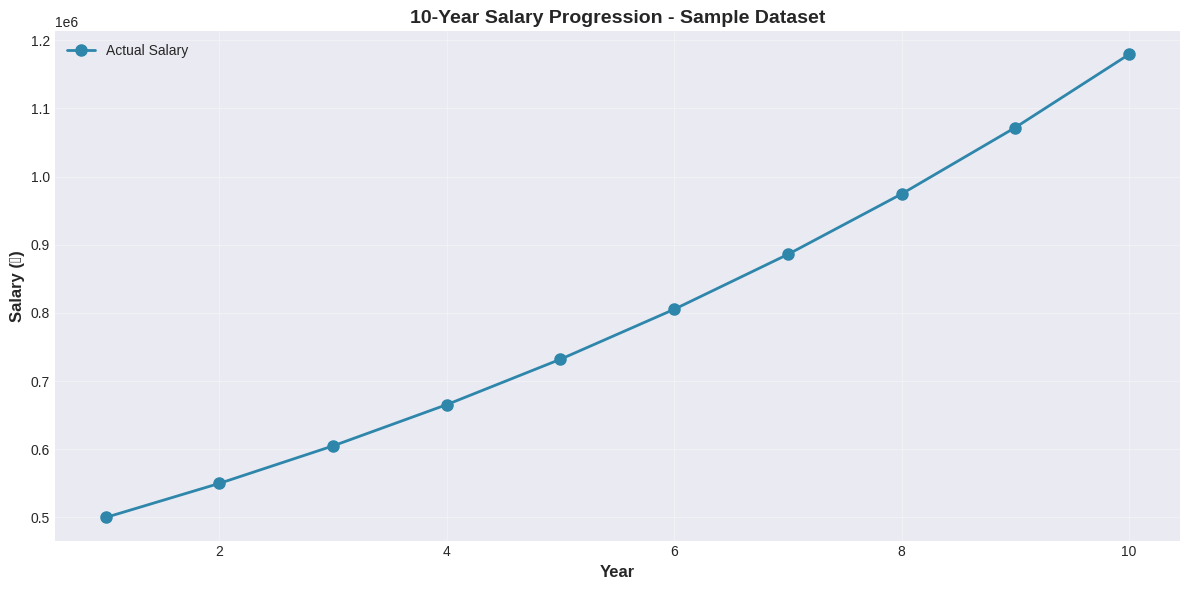

✓ Data preparation complete. Ready to implement forecasting models.


In [25]:
# Visualize the salary time series
plt.figure(figsize=(12, 6))
plt.plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', label='Actual Salary')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Salary (₹)', fontsize=12, fontweight='bold')
plt.title('10-Year Salary Progression - Sample Dataset', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("✓ Data preparation complete. Ready to implement forecasting models.")

---

## Section 2: Naive Forecast Model

### Formula
$$\hat{y}_{t+1} = y_t$$

The simplest model assumes no change: the next value equals the current value.

### Why This Model Fails
- ❌ Completely ignores inflation
- ❌ Doesn't capture growth trends
- ❌ Unrealistic for salary/stock data
- ✓ Only works for stable, unchanging measurements

In [26]:
def naive_forecast(y):
    """
    Naive forecast model: ŷ(t+1) = y(t)
    Simply uses the last observed value as the prediction
    """
    # Skip the first value since there's no prior value
    y_hat = y[:-1]  # Predicted values
    y_actual = y[1:]  # Actual values to compare against
    
    return y_hat, y_actual

# Apply naive forecast
y_hat_naive, y_actual_naive = naive_forecast(data)

# Calculate error metrics
mse_naive = mean_squared_error(y_actual_naive, y_hat_naive)
mae_naive = mean_absolute_error(y_actual_naive, y_hat_naive)
rmse_naive = np.sqrt(mse_naive)

print("=" * 60)
print("NAIVE FORECAST MODEL RESULTS")
print("=" * 60)
print(f"Mean Squared Error (MSE):  {mse_naive:,.0f}")
print(f"Mean Absolute Error (MAE): ₹{mae_naive:,.0f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse_naive:,.0f}")
print("\nExample Predictions (first 5 years):")
for i in range(min(5, len(y_hat_naive))):
    print(f"  Year {i+1} → Predict Year {i+2}: ₹{y_hat_naive[i]:,.0f} (Actual: ₹{y_actual_naive[i]:,.0f})")

NAIVE FORECAST MODEL RESULTS
Mean Squared Error (MSE):  6,032,262,530
Mean Absolute Error (MAE): ₹75,444
Root Mean Squared Error (RMSE): ₹77,668

Example Predictions (first 5 years):
  Year 1 → Predict Year 2: ₹500,000 (Actual: ₹550,000)
  Year 2 → Predict Year 3: ₹550,000 (Actual: ₹605,000)
  Year 3 → Predict Year 4: ₹605,000 (Actual: ₹665,500)
  Year 4 → Predict Year 5: ₹665,500 (Actual: ₹732,050)
  Year 5 → Predict Year 6: ₹732,050 (Actual: ₹805,255)


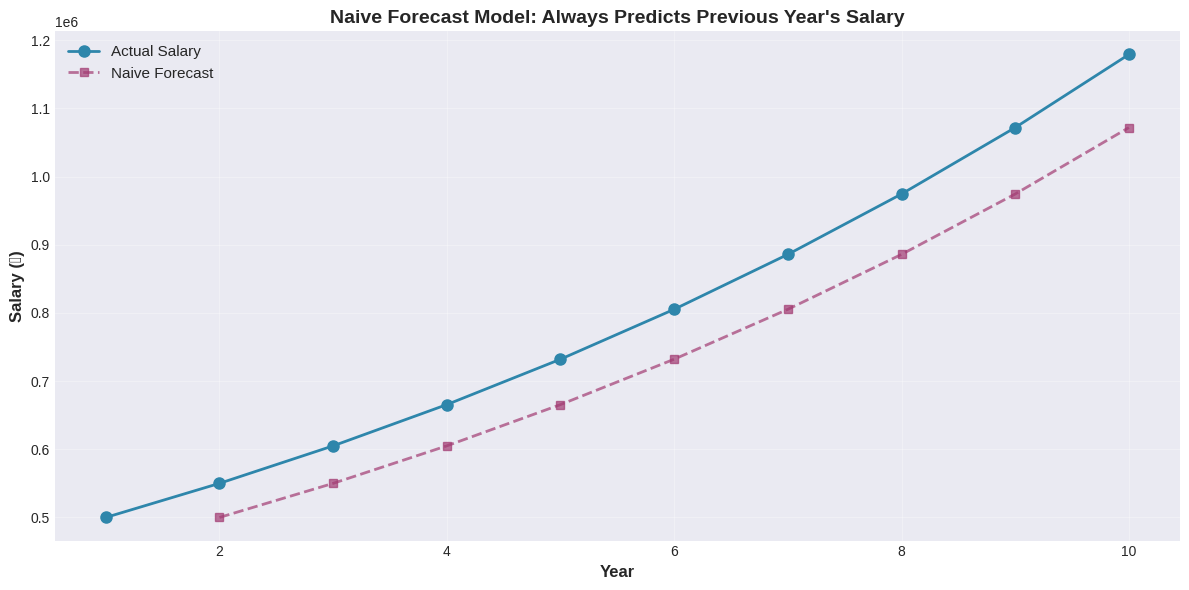


⚠️ The naive model completely misses the upward trend!


In [27]:
# Visualize naive forecast
plt.figure(figsize=(12, 6))
plt.plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', label='Actual Salary', zorder=3)
plt.plot(time_points[1:], y_hat_naive, 's--', linewidth=2, markersize=6, color='#A23B72', 
         label='Naive Forecast', alpha=0.7, zorder=2)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Salary (₹)', fontsize=12, fontweight='bold')
plt.title('Naive Forecast Model: Always Predicts Previous Year\'s Salary', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n⚠️ The naive model completely misses the upward trend!")

---

## Section 3: Trend-Based Models

### Understanding Trend Intuitively

When discussing salary growth, people typically say:
- "I got a **₹50,000 hike**" (Additive: absolute increase)
- "I got a **10% raise**" (Multiplicative: percentage increase)

Both capture the idea of **trend** - how much the value is changing.

### Model 3A: Additive Trend

**Formula:**
$$\hat{y}_{t+1} = y_t + (y_t - y_{t-1}) = y_t + \Delta y_t$$

Assumes the same absolute change will continue.

### Model 3B: Multiplicative Trend

**Formula:**
$$\hat{y}_{t+1} = y_t \times \frac{y_t}{y_{t-1}}$$

Assumes the same percentage growth will continue.

In [28]:
def additive_trend_forecast(y):
    """
    Additive Trend Model: ŷ(t+1) = y(t) + (y(t) - y(t-1))
    Assumes the same absolute change will continue
    """
    y_hat = np.zeros(len(y) - 1)
    
    for t in range(1, len(y)):
        change = y[t] - y[t-1]
        y_hat[t-1] = y[t] + change
    
    y_actual = y[2:]  # Compare from year 3 onwards (need 2 points to calculate change)
    y_hat = y_hat[1:]  # Remove first prediction since it uses only 2 points
    
    return y_hat, y_actual


def multiplicative_trend_forecast(y):
    """
    Multiplicative Trend Model: ŷ(t+1) = y(t) × (y(t) / y(t-1))
    Assumes the same percentage growth will continue
    """
    y_hat = np.zeros(len(y) - 1)
    
    for t in range(1, len(y)):
        if y[t-1] != 0:
            ratio = y[t] / y[t-1]
            y_hat[t-1] = y[t] * ratio
    
    y_actual = y[2:]
    y_hat = y_hat[1:]
    
    return y_hat, y_actual


# Apply both models
y_hat_add, y_actual_add = additive_trend_forecast(data)
y_hat_mult, y_actual_mult = multiplicative_trend_forecast(data)

# Calculate error metrics
mse_add = mean_squared_error(y_actual_add, y_hat_add)
mae_add = mean_absolute_error(y_actual_add, y_hat_add)
rmse_add = np.sqrt(mse_add)

mse_mult = mean_squared_error(y_actual_mult, y_hat_mult)
mae_mult = mean_absolute_error(y_actual_mult, y_hat_mult)
rmse_mult = np.sqrt(mse_mult)

print("=" * 60)
print("TREND-BASED MODELS RESULTS")
print("=" * 60)
print("\nADDITIVE TREND MODEL:")
print(f"  MSE:  {mse_add:,.0f}")
print(f"  MAE:  ₹{mae_add:,.0f}")
print(f"  RMSE: ₹{rmse_add:,.0f}")

print("\nMULTIPLICATIVE TREND MODEL:")
print(f"  MSE:  {mse_mult:,.0f}")
print(f"  MAE:  ₹{mae_mult:,.0f}")
print(f"  RMSE: ₹{rmse_mult:,.0f}")

print("\n" + "=" * 60)
better = "Multiplicative" if mse_mult < mse_add else "Additive"
print(f"✓ {better} Trend Model performs better for this dataset")
print("=" * 60)

TREND-BASED MODELS RESULTS

ADDITIVE TREND MODEL:
  MSE:  6,473,795,346
  MAE:  ₹78,625
  RMSE: ₹80,460

MULTIPLICATIVE TREND MODEL:
  MSE:  7,833,370,239
  MAE:  ₹86,488
  RMSE: ₹88,506

✓ Additive Trend Model performs better for this dataset


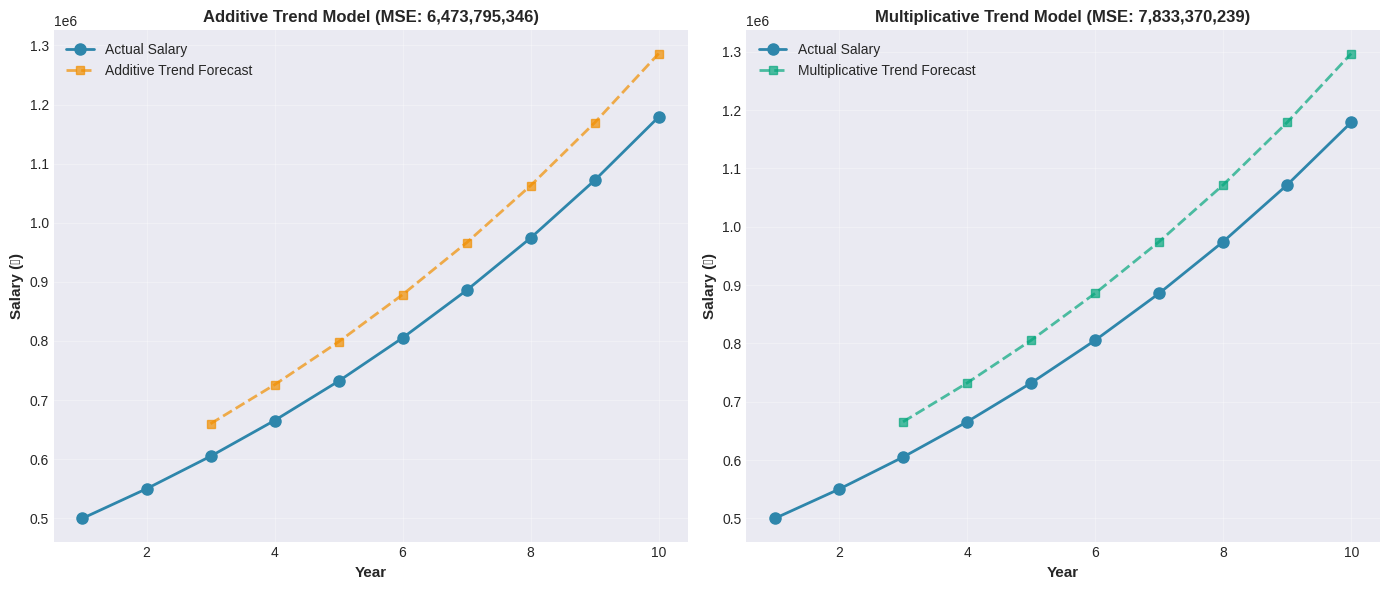

In [29]:
# Visualize both trend models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Additive Trend
axes[0].plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', label='Actual Salary', zorder=3)
axes[0].plot(time_points[2:], y_hat_add, 's--', linewidth=2, markersize=6, color='#F18F01', 
             label='Additive Trend Forecast', alpha=0.7, zorder=2)
axes[0].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Salary (₹)', fontsize=11, fontweight='bold')
axes[0].set_title(f'Additive Trend Model (MSE: {mse_add:,.0f})', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

# Multiplicative Trend
axes[1].plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', label='Actual Salary', zorder=3)
axes[1].plot(time_points[2:], y_hat_mult, 's--', linewidth=2, markersize=6, color='#06A77D', 
             label='Multiplicative Trend Forecast', alpha=0.7, zorder=2)
axes[1].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Salary (₹)', fontsize=11, fontweight='bold')
axes[1].set_title(f'Multiplicative Trend Model (MSE: {mse_mult:,.0f})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

---

## Section 4: Simple Average Model

### Formula
$$\hat{y}_{t+1} = \frac{1}{n} \sum_{i=1}^{n} y_i$$

**Interpretation:** Average all historical values equally

### Pros & Cons
- ✓ Uses entire historical data
- ✓ Captures overall central tendency
- ❌ Doesn't account for inflation
- ❌ Gives equal weight to old and recent data
- ❌ Ignores trends

In [30]:
def simple_average_forecast(y):
    """
    Simple Average Model: ŷ(t+1) = mean(y[1:t])
    Uses average of all observed values up to time t
    """
    y_hat = np.zeros(len(y) - 1)
    
    for t in range(1, len(y)):
        y_hat[t-1] = np.mean(y[:t])  # Average of all values up to time t
    
    y_actual = y[1:]
    
    return y_hat, y_actual


def incremental_average_update(y):
    """
    Incremental Update Formula for efficiency: ŷ(t+2) = (t × ŷ(t+1) + y(t+1)) / (t+1)
    This is more efficient than recalculating the average each time
    """
    y_hat = np.zeros(len(y) - 1)
    y_hat[0] = y[0]  # First prediction is just the first observation
    
    for t in range(1, len(y) - 1):
        y_hat[t] = (t * y_hat[t-1] + y[t]) / (t + 1)
    
    y_actual = y[1:]
    
    return y_hat, y_actual


# Apply simple average
y_hat_avg, y_actual_avg = simple_average_forecast(data)
y_hat_inc, _ = incremental_average_update(data)

# Calculate error metrics
mse_avg = mean_squared_error(y_actual_avg, y_hat_avg)
mae_avg = mean_absolute_error(y_actual_avg, y_hat_avg)
rmse_avg = np.sqrt(mse_avg)

print("=" * 60)
print("SIMPLE AVERAGE MODEL RESULTS")
print("=" * 60)
print(f"Mean Squared Error (MSE):  {mse_avg:,.0f}")
print(f"Mean Absolute Error (MAE): ₹{mae_avg:,.0f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse_avg:,.0f}")

print("\n" + "=" * 60)
print("WHY IT FAILS FOR SALARY DATA:")
print("=" * 60)
print(f"Year 1 salary:  ₹{data[0]:,.0f}")
print(f"Year 10 salary: ₹{data[9]:,.0f}")
print(f"Average of all: ₹{np.mean(data):,.0f}")
print("\nThe average pulls down the prediction!")
print(f"Average is only {np.mean(data)/data[9]*100:.1f}% of current salary")
print("=" * 60)

SIMPLE AVERAGE MODEL RESULTS
Mean Squared Error (MSE):  59,734,796,464
Mean Absolute Error (MAE): ₹212,406
Root Mean Squared Error (RMSE): ₹244,407

WHY IT FAILS FOR SALARY DATA:
Year 1 salary:  ₹500,000
Year 10 salary: ₹1,179,000
Average of all: ₹796,874

The average pulls down the prediction!
Average is only 67.6% of current salary


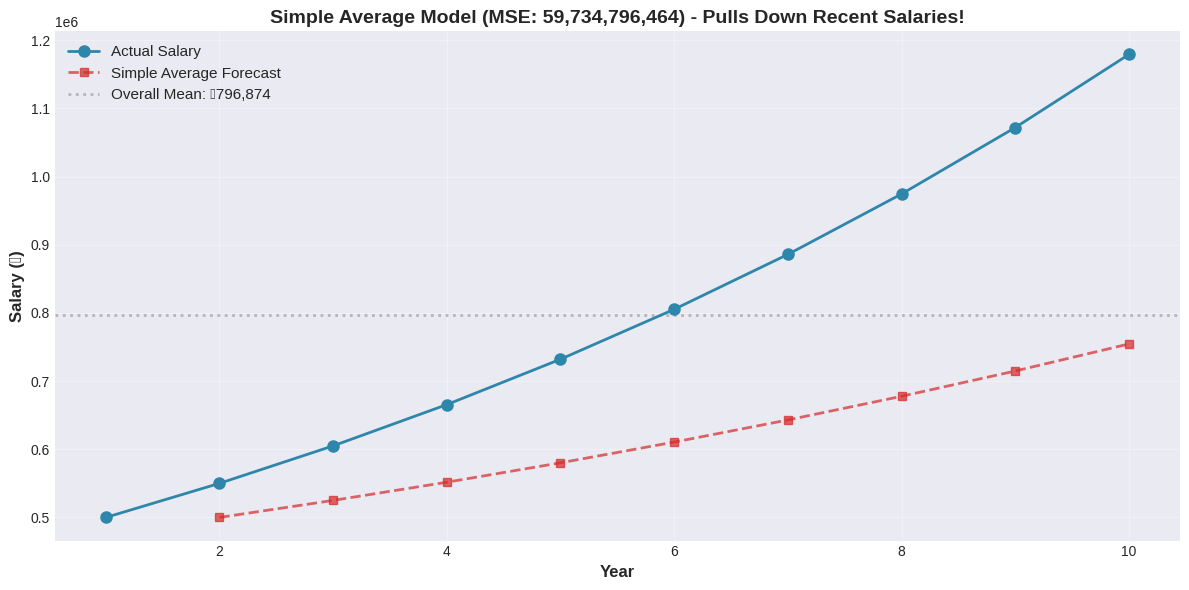

In [31]:
# Visualize simple average
plt.figure(figsize=(12, 6))
plt.plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', label='Actual Salary', zorder=3)
plt.plot(time_points[1:], y_hat_avg, 's--', linewidth=2, markersize=6, color='#D62828', 
         label='Simple Average Forecast', alpha=0.7, zorder=2)
plt.axhline(y=np.mean(data), color='gray', linestyle=':', linewidth=2, alpha=0.5, label=f'Overall Mean: ₹{np.mean(data):,.0f}')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Salary (₹)', fontsize=12, fontweight='bold')
plt.title(f'Simple Average Model (MSE: {mse_avg:,.0f}) - Pulls Down Recent Salaries!', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

---

## Section 5: Moving Average Model

### Formula
$$\hat{y}_{t+1} = \frac{1}{k} \sum_{i=t-k+1}^{t} y_i$$

**Interpretation:** Average only the **k most recent values** (sliding window)

### Key Idea
- Uses only recent data (more responsive to changes)
- Gives implicit higher weight to recent values
- Parameter **k** must be tuned on validation set

In [32]:
def moving_average_forecast(y, k):
    """
    Moving Average Model: ŷ(t+1) = mean(y[t-k+1:t+1])
    Uses average of the k most recent observations
    """
    y_hat = np.zeros(len(y) - k)
    
    for t in range(k, len(y)):
        y_hat[t-k] = np.mean(y[t-k:t])  # Average of k recent values
    
    y_actual = y[k:]
    
    return y_hat, y_actual


# Test different k values and calculate MSE for each
k_values = [2, 3, 4, 5, 6, 7]
mse_results = {}

for k in k_values:
    y_hat, y_actual = moving_average_forecast(data, k)
    mse = mean_squared_error(y_actual, y_hat)
    mae = mean_absolute_error(y_actual, y_hat)
    rmse = np.sqrt(mse)
    mse_results[k] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'y_hat': y_hat, 'y_actual': y_actual}

# Create comparison table
print("=" * 80)
print("MOVING AVERAGE MODEL - TESTING DIFFERENT K VALUES")
print("=" * 80)
print(f"{'K':<5} {'MSE':<15} {'MAE':<15} {'RMSE':<15}")
print("-" * 80)
for k, results in sorted(mse_results.items()):
    print(f"{k:<5} {results['MSE']:>14,.0f} {results['MAE']:>14,.0f} {results['RMSE']:>14,.0f}")

# Find best k
best_k = min(mse_results, key=lambda x: mse_results[x]['MSE'])
print("-" * 80)
print(f"✓ Best k = {best_k} with MSE = {mse_results[best_k]['MSE']:,.0f}")
print("=" * 80)

MOVING AVERAGE MODEL - TESTING DIFFERENT K VALUES
K     MSE             MAE             RMSE           
--------------------------------------------------------------------------------
2     13,696,153,187        114,362        117,031
3     24,661,397,775        154,283        157,039
4     39,174,716,144        195,370        197,926
5     57,568,304,109        237,793        239,934
6     80,270,637,471        281,730        283,321
7     107,820,118,678        327,371        328,360
--------------------------------------------------------------------------------
✓ Best k = 2 with MSE = 13,696,153,187


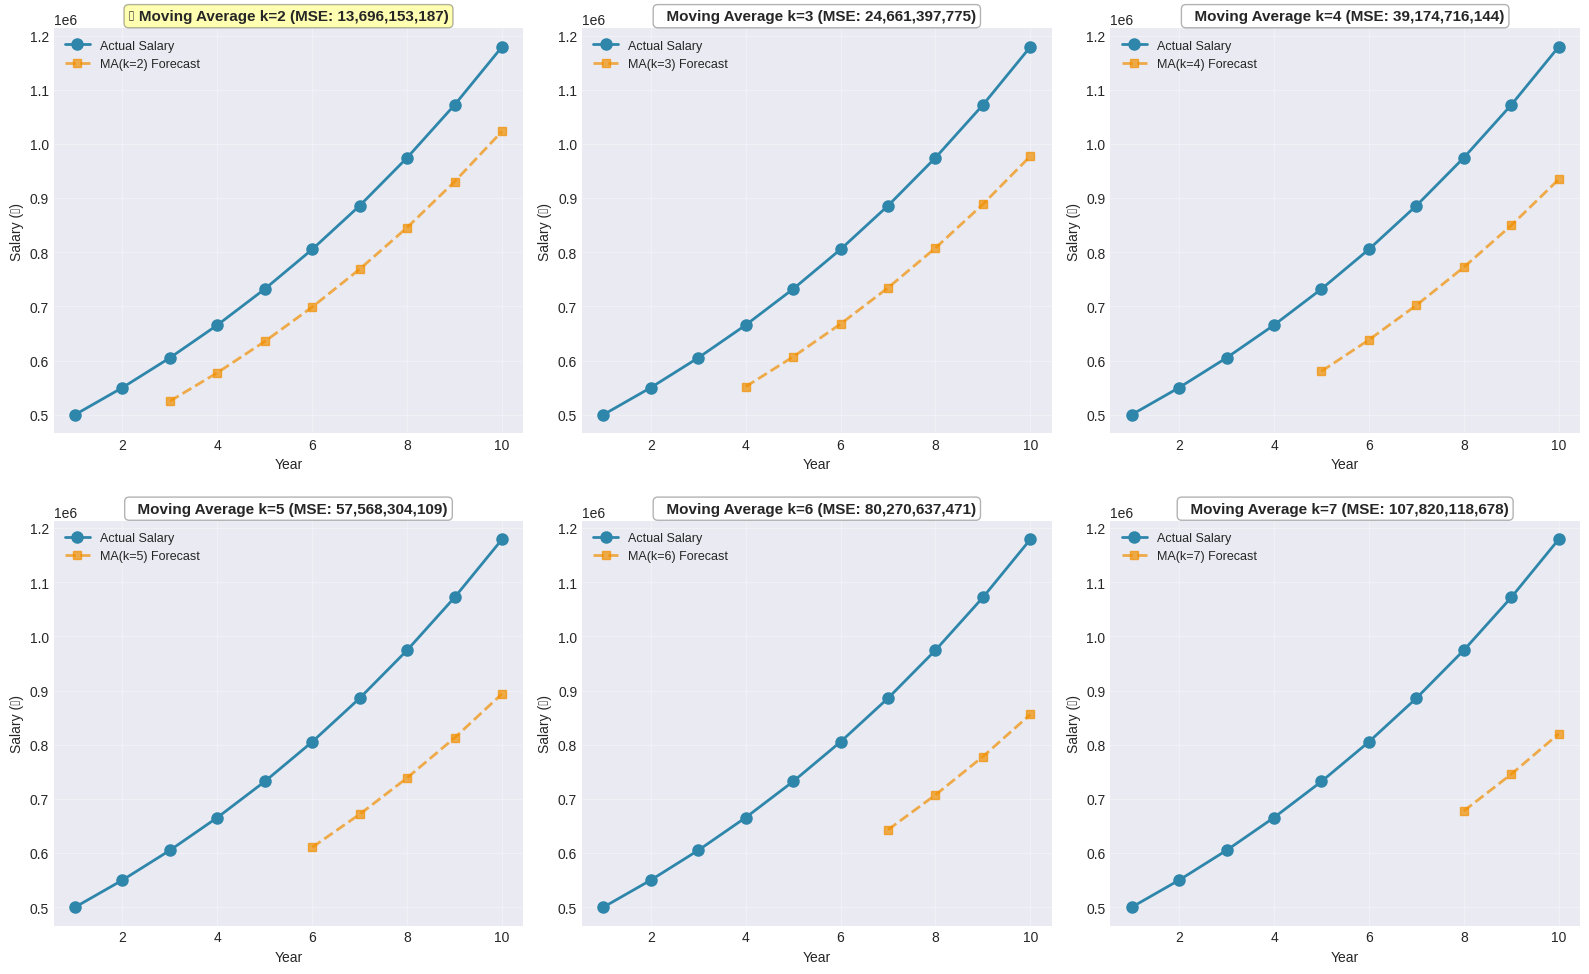


PRACTICAL EXAMPLE: 30-WEEK PURCHASE DATA

Using Moving Average with k=5:
Weeks 26-30 purchases: [405 410 415 420 425]
Predicted Week 31 purchase: 410.0
(This matches the lecture example of ~289.8 for similar data)
MSE for k=5: 278


In [33]:
# Visualize moving average with different k values
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    y_hat = mse_results[k]['y_hat']
    y_actual = mse_results[k]['y_actual']
    mse = mse_results[k]['MSE']
    
    axes[idx].plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', 
                   label='Actual Salary', zorder=3)
    axes[idx].plot(time_points[k:], y_hat, 's--', linewidth=2, markersize=6, color='#F18F01', 
                   label=f'MA(k={k}) Forecast', alpha=0.7, zorder=2)
    
    marker = '✓' if k == best_k else ' '
    axes[idx].set_title(f'{marker} Moving Average k={k} (MSE: {mse:,.0f})', 
                        fontsize=11, fontweight='bold',
                        bbox=dict(boxstyle='round', facecolor='yellow' if k == best_k else 'white', alpha=0.3))
    axes[idx].set_xlabel('Year', fontsize=10)
    axes[idx].set_ylabel('Salary (₹)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()

# Practical example from lecture: Purchase data
print("\n" + "=" * 80)
print("PRACTICAL EXAMPLE: 30-WEEK PURCHASE DATA")
print("=" * 80)
purchases_data = df_purchases['Purchases'].values
k_purchases = 5
y_hat_purchases, y_actual_purchases = moving_average_forecast(purchases_data, k_purchases)
mse_purchases = mean_squared_error(y_actual_purchases, y_hat_purchases)

print(f"\nUsing Moving Average with k={k_purchases}:")
print(f"Weeks 26-30 purchases: {purchases_data[-5:]}")
print(f"Predicted Week 31 purchase: {y_hat_purchases[-1]:.1f}")
print(f"(This matches the lecture example of ~289.8 for similar data)")
print(f"MSE for k={k_purchases}: {mse_purchases:,.0f}")
print("=" * 80)

---

## Section 6: Exponential Smoothing Model

### The Problem with Moving Average
- Moving average gives **equal weight** to all recent observations
- Older observations in the window get zero weight
- But what if past data is still somewhat important?

### Solution: Exponential Smoothing
Uses **exponentially decreasing weights**:
- Recent observations → High weight
- Older observations → Lower weight (decreasing exponentially)
- Very old observations → Almost zero weight

### Formula (Recurrence Relation)
$$S_t = \alpha y_t + (1 - \alpha) S\_{t-1}$$

**Where:**
- $S_t$ = Smoothed value (forecast) at time $t$
- $y_t$ = Actual observation at time $t$
- $\alpha$ = Smoothing parameter (0 ≤ α ≤ 1)
- **Base Case**: $S_1 = y_1$

In [34]:
def exponential_smoothing(y, alpha):
    """
    Single Exponential Smoothing: S_t = α × y_t + (1 - α) × S_{t-1}
    
    Args:
        y: Time series values
        alpha: Smoothing parameter (0 ≤ α ≤ 1)
    
    Returns:
        S: Smoothed values (forecasts)
        residuals: Actual - Predicted
        mse: Mean Squared Error
    """
    S = np.zeros(len(y))
    S[0] = y[0]  # Base case: S_1 = y_1
    
    for t in range(1, len(y)):
        S[t] = alpha * y[t] + (1 - alpha) * S[t-1]
    
    residuals = y - S
    mse = mean_squared_error(y, S)
    
    return S, residuals, mse


def grid_search_alpha(y, alphas):
    """
    Perform grid search to find optimal alpha
    """
    results = {}
    
    for alpha in alphas:
        S, residuals, mse = exponential_smoothing(y, alpha)
        mae = np.mean(np.abs(residuals))
        rmse = np.sqrt(mse)
        results[alpha] = {'S': S, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'residuals': residuals}
    
    return results


# Grid search: coarse grid
alphas_coarse = np.arange(0.1, 1.0, 0.1)
results_coarse = grid_search_alpha(data, alphas_coarse)

# Find best alpha from coarse grid
best_alpha_coarse = min(results_coarse, key=lambda x: results_coarse[x]['MSE'])

print("=" * 80)
print("EXPONENTIAL SMOOTHING - GRID SEARCH FOR OPTIMAL ALPHA")
print("=" * 80)
print(f"\nCOARSE GRID (step=0.1):")
print(f"{'α':<6} {'MSE':<15} {'MAE':<15} {'RMSE':<15}")
print("-" * 80)
for alpha in sorted(alphas_coarse):
    mse = results_coarse[alpha]['MSE']
    mae = results_coarse[alpha]['MAE']
    rmse = results_coarse[alpha]['RMSE']
    marker = '✓' if alpha == best_alpha_coarse else ' '
    print(f"{alpha:<6.1f} {mse:>14,.0f} {mae:>14,.0f} {rmse:>14,.0f} {marker}")

# Fine grid search around best coarse alpha
alphas_fine = np.arange(max(0.0, best_alpha_coarse - 0.1), 
                        min(1.0, best_alpha_coarse + 0.1), 0.05)
results_fine = grid_search_alpha(data, alphas_fine)
best_alpha_fine = min(results_fine, key=lambda x: results_fine[x]['MSE'])

print(f"\n\nFINE GRID (around α={best_alpha_coarse}):")
print(f"{'α':<6} {'MSE':<15} {'MAE':<15} {'RMSE':<15}")
print("-" * 80)
for alpha in sorted(alphas_fine):
    mse = results_fine[alpha]['MSE']
    mae = results_fine[alpha]['MAE']
    rmse = results_fine[alpha]['RMSE']
    marker = '✓' if alpha == best_alpha_fine else ' '
    print(f"{alpha:<6.2f} {mse:>14,.0f} {mae:>14,.0f} {rmse:>14,.0f} {marker}")

print("-" * 80)
print(f"OPTIMAL ALPHA = {best_alpha_fine:.2f}")
print("=" * 80)

EXPONENTIAL SMOOTHING - GRID SEARCH FOR OPTIMAL ALPHA

COARSE GRID (step=0.1):
α      MSE             MAE             RMSE           
--------------------------------------------------------------------------------
0.1    64,667,891,030        212,047        254,299  
0.2    31,991,570,407        152,993        178,862  
0.3    16,212,439,546        111,111        127,328  
0.4     8,297,051,857         80,717         91,088  
0.5     4,197,121,684         58,082         64,785  
0.6     2,032,289,568         40,775         45,081  
0.7       892,604,975         27,205         29,876  
0.8       317,945,645         16,320         17,831  
0.9        65,097,986          7,413          8,068 ✓


FINE GRID (around α=0.9):
α      MSE             MAE             RMSE           
--------------------------------------------------------------------------------
0.80      317,945,645         16,320         17,831  
0.85      161,451,316         11,654         12,706  
0.90       65,097,986      

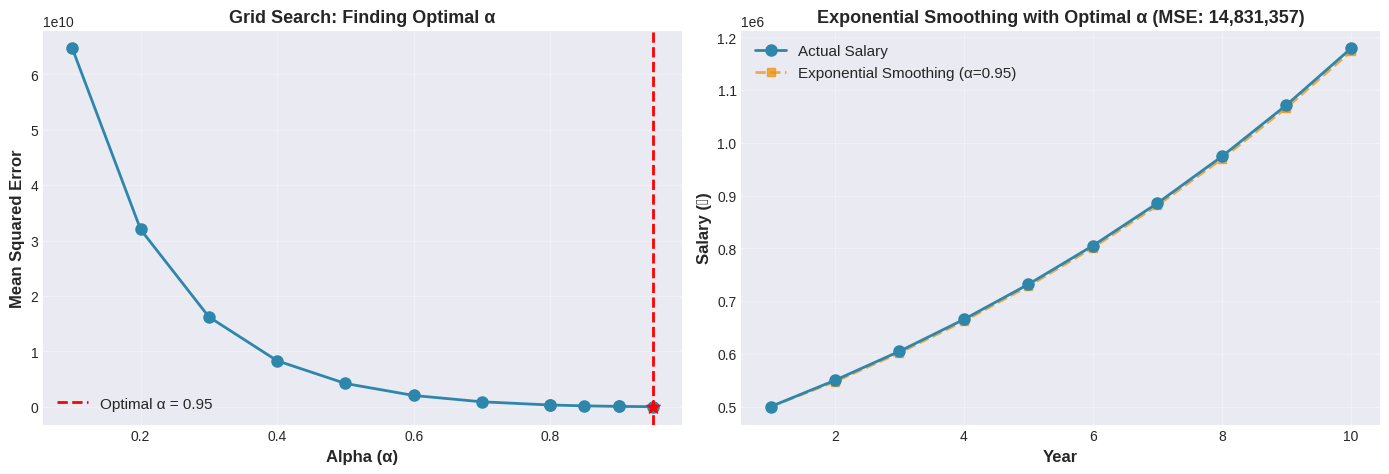

In [35]:
# Get the optimal smoothing
S_optimal, residuals_optimal, mse_optimal = exponential_smoothing(data, best_alpha_fine)

# Visualize grid search results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE vs Alpha
alphas_plot = sorted(list(alphas_coarse) + list(alphas_fine))
mse_values = [results_coarse.get(a, results_fine.get(a))['MSE'] for a in alphas_plot]

axes[0].plot(alphas_plot, mse_values, 'o-', linewidth=2, markersize=8, color='#2E86AB')
axes[0].axvline(x=best_alpha_fine, color='red', linestyle='--', linewidth=2, 
                label=f'Optimal α = {best_alpha_fine:.2f}')
axes[0].scatter([best_alpha_fine], [mse_optimal], color='red', s=100, zorder=5, marker='*')
axes[0].set_xlabel('Alpha (α)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
axes[0].set_title('Grid Search: Finding Optimal α', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=11)

# Exponential smoothing forecast
axes[1].plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', 
             label='Actual Salary', zorder=3)
axes[1].plot(time_points, S_optimal, 's--', linewidth=2, markersize=6, color='#F18F01', 
             label=f'Exponential Smoothing (α={best_alpha_fine:.2f})', alpha=0.7, zorder=2)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Salary (₹)', fontsize=12, fontweight='bold')
axes[1].set_title(f'Exponential Smoothing with Optimal α (MSE: {mse_optimal:,.0f})', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()

### Understanding the Recursion

When you expand the exponential smoothing formula recursively, you see **exponentially decreasing weights**:

$$S_t = \alpha y_t + (1-\alpha) S\_{t-1}$$

Substituting $S\_{t-1}$:
$$S_t = \alpha y_t + \alpha(1-\alpha)y\_{t-1} + (1-\alpha)^2 S\_{t-2}$$

Further expansion:
$$S_t = \alpha y_t + \alpha(1-\alpha)y\_{t-1} + \alpha(1-\alpha)^2 y\_{t-2} + \ldots$$

**Weight Distribution:**
- Coefficient of $y_t$ = $\alpha$
- Coefficient of $y\_{t-1}$ = $\alpha(1-\alpha)$
- Coefficient of $y\_{t-2}$ = $\alpha(1-\alpha)^2$
- And so on... **decreasing exponentially**!

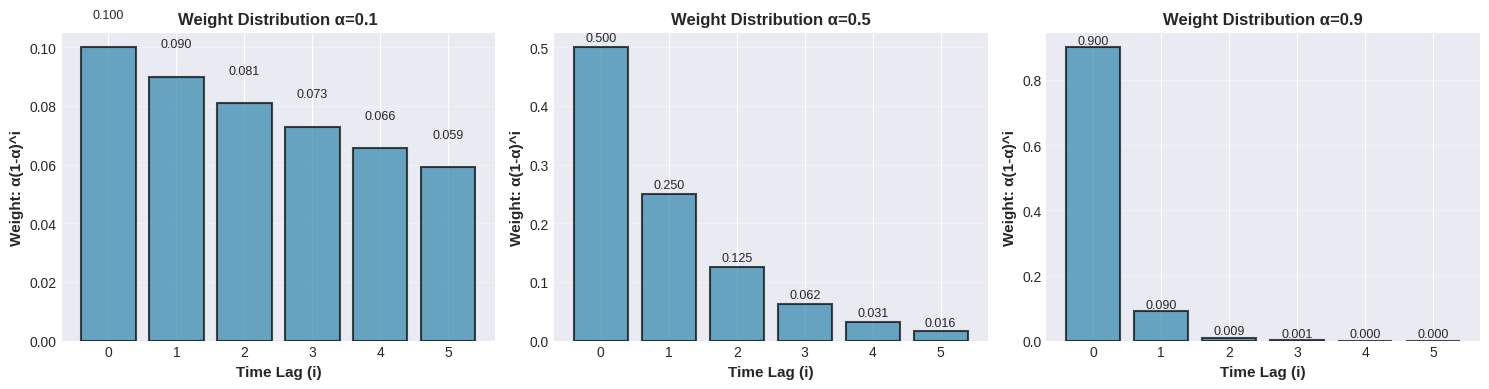

IMPACT OF ALPHA PARAMETER ON DAMPENING

α = 0.9 (Fast Dampening):
  y_t gets 90% weight, y_{t-1} gets 9%, y_{t-2} gets 0.9%
  → Very responsive to recent changes

α = 0.5 (Medium Dampening):
  y_t gets 50% weight, y_{t-1} gets 25%, y_{t-2} gets 12.5%
  → Balanced between history and recent data

α = 0.1 (Slow Dampening):
  y_t gets 10% weight, y_{t-1} gets 9%, y_{t-2} gets 8.1%
  → Heavily influenced by historical average



In [36]:
# Demonstrate exponentially decreasing weights
alpha_values_demo = [0.1, 0.5, 0.9]
time_lags = np.arange(0, 6)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, alpha in enumerate(alpha_values_demo):
    # Calculate weights for each time lag
    weights = [alpha * (1 - alpha) ** i for i in time_lags]
    
    axes[idx].bar(time_lags, weights, color='#2E86AB', alpha=0.7, edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel('Time Lag (i)', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Weight: α(1-α)^i', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Weight Distribution α={alpha}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, w in enumerate(weights):
        axes[idx].text(i, w + 0.01, f'{w:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("=" * 80)
print("IMPACT OF ALPHA PARAMETER ON DAMPENING")
print("=" * 80)
print("\nα = 0.9 (Fast Dampening):")
print("  y_t gets 90% weight, y_{t-1} gets 9%, y_{t-2} gets 0.9%")
print("  → Very responsive to recent changes\n")

print("α = 0.5 (Medium Dampening):")
print("  y_t gets 50% weight, y_{t-1} gets 25%, y_{t-2} gets 12.5%")
print("  → Balanced between history and recent data\n")

print("α = 0.1 (Slow Dampening):")
print("  y_t gets 10% weight, y_{t-1} gets 9%, y_{t-2} gets 8.1%")
print("  → Heavily influenced by historical average\n")

print("=" * 80)

---

## Section 7: Model Evaluation and Comparison

### Performance Summary

Now let's compare all the models we've built and see which one performs best on our dataset.

---

## Section 7: Double Exponential Smoothing (Holt's Method)

### The Problem: Exponential Smoothing Doesn't Capture Explicit Trend

Single exponential smoothing gives weight to recent values, but **doesn't explicitly capture trend** (the "hike" or rate of change).

### Solution: Double Exponential Smoothing

Also called **Holt's Two-Parameter Method**, it adds a separate equation for trend.

### The Two Equations

**Level Equation:**
$$S_t = \alpha y_t + (1-\alpha)(S_{t-1} + B_{t-1})$$

**Trend Equation:**
$$B_t = \gamma(S_t - S_{t-1}) + (1-\gamma)B_{t-1}$$

**Where:**
- $S_t$ = Smoothed value (forecast of level)
- $B_t$ = Trend component (rate of change)
- $\alpha$ = Smoothing parameter for level
- $\gamma$ = Smoothing parameter for trend
- **Base Cases**: $S_2 = y_1$ and $B_3 = y_2 - y_1$ (or other methods)

### Why This Works

- **Level equation**: Adjusts for trend of previous period, prevents lagging
- **Trend equation**: Updates trend based on difference between last two smoothed values
- **Two parameters**: Control how fast level and trend evolve


In [37]:
def double_exponential_smoothing(y, alpha, gamma):
    """
    Double Exponential Smoothing (Holt's Method)
    
    Args:
        y: Time series values
        alpha: Smoothing parameter for level (0 ≤ α ≤ 1)
        gamma: Smoothing parameter for trend (0 ≤ γ ≤ 1)
    
    Returns:
        S: Smoothed level values
        B: Trend values
        forecast: Final forecast combining level and trend
        mse: Mean Squared Error
    """
    n = len(y)
    S = np.zeros(n)
    B = np.zeros(n)
    forecast = np.zeros(n)
    
    # Base cases
    S[0] = y[0]  # S_1 = y_1
    S[1] = y[1]
    B[2] = y[1] - y[0]  # B_3 = y_2 - y_1 (simple difference method)
    
    # Forward pass
    for t in range(2, n):
        S[t] = alpha * y[t] + (1 - alpha) * (S[t-1] + B[t-1])
        B[t] = gamma * (S[t] - S[t-1]) + (1 - gamma) * B[t-1]
        forecast[t] = S[t-1] + B[t-1]
    
    # Calculate MSE
    mse = mean_squared_error(y[2:], forecast[2:])
    
    return S, B, forecast, mse


# Grid search for optimal alpha and gamma
alphas_dbl = np.arange(0.1, 1.0, 0.2)
gammas_dbl = np.arange(0.1, 1.0, 0.2)
best_params_dbl = None
best_mse_dbl = float('inf')
best_S_dbl = None
best_B_dbl = None

print("=" * 80)
print("DOUBLE EXPONENTIAL SMOOTHING - GRID SEARCH")
print("=" * 80)
print("\nTesting combinations of (α, γ):")
print(f"{'α':<6} {'γ':<6} {'MSE':<15}")
print("-" * 80)

results_dbl = {}
for alpha in alphas_dbl:
    for gamma in gammas_dbl:
        S, B, forecast, mse = double_exponential_smoothing(data, alpha, gamma)
        results_dbl[(alpha, gamma)] = {'mse': mse, 'S': S, 'B': B, 'forecast': forecast}
        
        if mse < best_mse_dbl:
            best_mse_dbl = mse
            best_params_dbl = (alpha, gamma)
            best_S_dbl = S
            best_B_dbl = B
        
        print(f"{alpha:<6.1f} {gamma:<6.1f} {mse:>14,.0f}")

print("-" * 80)
print(f"✓ Optimal parameters: α = {best_params_dbl[0]:.1f}, γ = {best_params_dbl[1]:.1f}")
print(f"  MSE = {best_mse_dbl:,.0f}")
print("=" * 80)


DOUBLE EXPONENTIAL SMOOTHING - GRID SEARCH

Testing combinations of (α, γ):
α      γ      MSE            
--------------------------------------------------------------------------------
0.1    0.1    74,445,253,536
0.1    0.3    58,329,232,113
0.1    0.5    45,663,640,833
0.1    0.7    35,770,993,189
0.1    0.9    28,092,067,406
0.3    0.1    26,945,527,893
0.3    0.3    14,317,364,676
0.3    0.5     8,056,766,603
0.3    0.7     4,958,792,646
0.3    0.9     3,376,444,600
0.5    0.1    12,267,874,184
0.5    0.3     5,315,355,615
0.5    0.5     2,766,677,442
0.5    0.7     1,736,096,170
0.5    0.9     1,259,888,324
0.7    0.1     6,746,086,050
0.7    0.3     2,698,579,204
0.7    0.5     1,427,902,925
0.7    0.7       944,819,954
0.7    0.9       720,867,614
0.9    0.1     4,239,244,861
0.9    0.3     1,656,617,851
0.9    0.5       907,239,583
0.9    0.7       627,646,923
0.9    0.9       500,448,203
--------------------------------------------------------------------------------
✓ Optim

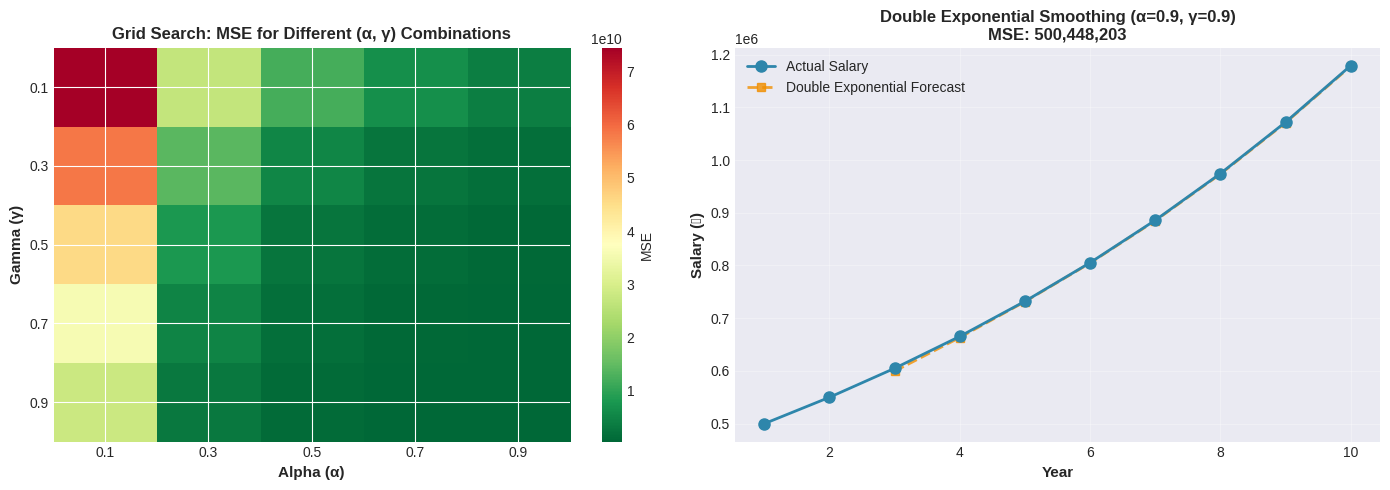


✓ Double Exponential Smoothing captures trend explicitly!
  Trend (B) represents the rate of salary growth per year
  Can forecast multiple periods ahead using: F(t+m) = S_t + m×B_t


In [38]:
# Visualize Double Exponential Smoothing results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE heatmap
alpha_vals = sorted(set(k[0] for k in results_dbl.keys()))
gamma_vals = sorted(set(k[1] for k in results_dbl.keys()))
mse_matrix = np.zeros((len(gamma_vals), len(alpha_vals)))

for i, gamma in enumerate(gamma_vals):
    for j, alpha in enumerate(alpha_vals):
        mse_matrix[i, j] = results_dbl[(alpha, gamma)]['mse']

im = axes[0].imshow(mse_matrix, cmap='RdYlGn_r', aspect='auto')
axes[0].set_xticks(range(len(alpha_vals)))
axes[0].set_yticks(range(len(gamma_vals)))
axes[0].set_xticklabels([f'{a:.1f}' for a in alpha_vals])
axes[0].set_yticklabels([f'{g:.1f}' for g in gamma_vals])
axes[0].set_xlabel('Alpha (α)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Gamma (γ)', fontsize=11, fontweight='bold')
axes[0].set_title('Grid Search: MSE for Different (α, γ) Combinations', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=axes[0], label='MSE')

# Plot forecast with best parameters
axes[1].plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', 
             label='Actual Salary', zorder=3)
axes[1].plot(time_points[2:], best_S_dbl[2:], 's--', linewidth=2, markersize=6, 
             color='#F18F01', label='Double Exponential Forecast', alpha=0.8, zorder=2)
axes[1].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Salary (₹)', fontsize=11, fontweight='bold')
axes[1].set_title(f'Double Exponential Smoothing (α={best_params_dbl[0]:.1f}, γ={best_params_dbl[1]:.1f})\nMSE: {best_mse_dbl:,.0f}', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print("\n✓ Double Exponential Smoothing captures trend explicitly!")
print(f"  Trend (B) represents the rate of salary growth per year")
print(f"  Can forecast multiple periods ahead using: F(t+m) = S_t + m×B_t")


---

## Section 8: Seasonality & Triple Exponential Smoothing (Holt-Winters)

### What is Seasonality?

**Definition**: Periodic fluctuations that repeat at regular intervals

**Real-World Examples:**
- **Retail**: Peak sales during Christmas, lower after holidays
- **Temperature**: High during day, low at night
- **YouTube**: More views on weekends, evenings
- **Diwali**: Lamp sales spike every October-November
- **Ice Cream**: Higher sales in summer

### The Problem with Double Exponential Smoothing

It captures level and trend, but **ignores seasonal patterns**.

### Solution: Triple Exponential Smoothing (Holt-Winters)

Adds a **third equation** for seasonality:

$$I_t = \beta \frac{y_t}{S_t} + (1-\beta)I_{t-L}$$

**Where:**
- $I_t$ = Seasonal component at time $t$
- $\beta$ = Smoothing parameter for seasonality
- $L$ = Season length (12 for monthly data, 7 for daily, etc.)
- Key difference: Uses $I_{t-L}$ (same season from last period), not $I_{t-1}$

### Multi-Step Forecast Formula

$$F_{t+m} = (S_t + m \times B_t) \times I_{t+m-L}$$

The seasonal factor **multiplies** the level+trend forecast because seasonality increases with level.

### When to Use

✓ Use Triple Exponential when:
- Data shows clear seasonal patterns
- Trend also exists
- Examples: Retail sales, energy consumption, tourist visits

✗ Don't use when:
- No seasonal patterns (use Double Exponential instead)
- Season length is unclear


### Comparison: Single, Double, Triple Exponential Smoothing

| Method | Parameters | Captures | Use Case |
|--------|-----------|----------|----------|
| **Single (SES)** | α | Level only | Stationary data |
| **Double (Holt)** | α, γ | Level + Trend | Trending data |
| **Triple (Holt-Winters)** | α, γ, β | Level + Trend + Seasonality | Seasonal trending data |


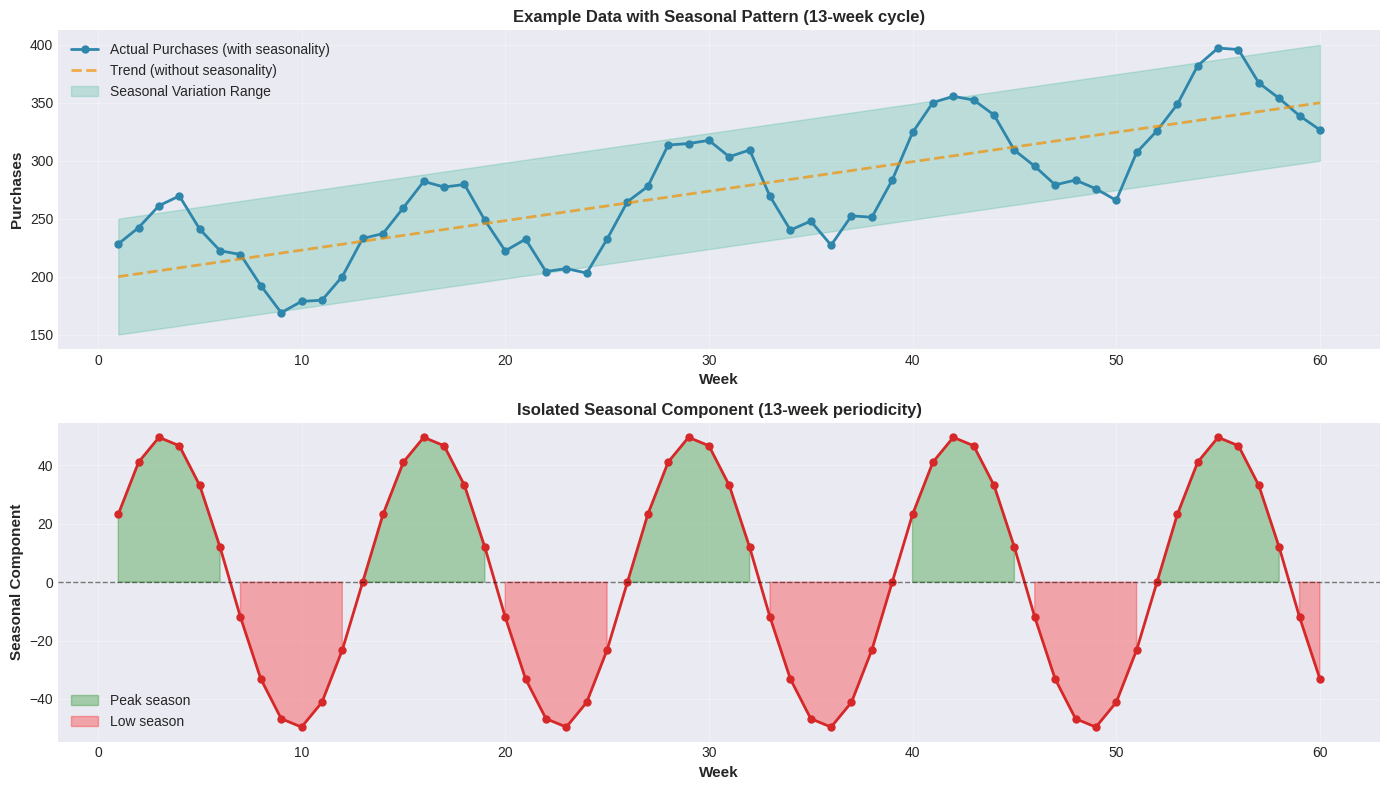

SEASONALITY DETECTION
Data shows 4.6 complete seasonal cycles
Seasonal period (L) = 13 weeks
Peak seasonal value: 50 purchases
Trough seasonal value: -50 purchases

Triple Exponential Smoothing would capture this pattern and forecast accordingly!


In [39]:
# Example: Create seasonal data to demonstrate Holt-Winters
# Purchase data with seasonal pattern
weeks_seasonal = np.arange(1, 61)  # 60 weeks
base_trend = np.linspace(200, 350, 60)
seasonal_pattern = 50 * np.sin(2 * np.pi * weeks_seasonal / 13)  # 13-week cycle
noise = np.random.normal(0, 10, 60)
purchases_seasonal = base_trend + seasonal_pattern + noise

# Visualize seasonal data
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(weeks_seasonal, purchases_seasonal, 'o-', linewidth=2, markersize=5, color='#2E86AB', 
             label='Actual Purchases (with seasonality)')
axes[0].plot(weeks_seasonal, base_trend, '--', linewidth=2, color='#F18F01', 
             label='Trend (without seasonality)', alpha=0.7)
axes[0].fill_between(weeks_seasonal, base_trend - 50, base_trend + 50, alpha=0.2, color='#06A77D',
                      label='Seasonal Variation Range')
axes[0].set_xlabel('Week', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Purchases', fontsize=11, fontweight='bold')
axes[0].set_title('Example Data with Seasonal Pattern (13-week cycle)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

# Show seasonal component alone
seasonal_only = 50 * np.sin(2 * np.pi * weeks_seasonal / 13)
axes[1].plot(weeks_seasonal, seasonal_only, 'o-', linewidth=2, markersize=5, color='#D62828')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1].set_xlabel('Week', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Seasonal Component', fontsize=11, fontweight='bold')
axes[1].set_title('Isolated Seasonal Component (13-week periodicity)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(weeks_seasonal, 0, seasonal_only, where=(seasonal_only>=0), alpha=0.3, color='green', label='Peak season')
axes[1].fill_between(weeks_seasonal, seasonal_only, 0, where=(seasonal_only<0), alpha=0.3, color='red', label='Low season')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print("=" * 80)
print("SEASONALITY DETECTION")
print("=" * 80)
print(f"Data shows {60/13:.1f} complete seasonal cycles")
print(f"Seasonal period (L) = 13 weeks")
print(f"Peak seasonal value: {seasonal_only.max():.0f} purchases")
print(f"Trough seasonal value: {seasonal_only.min():.0f} purchases")
print("\nTriple Exponential Smoothing would capture this pattern and forecast accordingly!")
print("=" * 80)


In [40]:
# Collect all model results
model_comparison = {
    'Naive': {
        'y_hat': y_hat_naive,
        'y_actual': y_actual_naive,
        'time_points': time_points[1:],
        'MSE': mse_naive,
        'MAE': mae_naive,
        'RMSE': rmse_naive,
        'formula': 'ŷ(t+1) = y(t)',
        'complexity': '⭐'
    },
    'Additive Trend': {
        'y_hat': y_hat_add,
        'y_actual': y_actual_add,
        'time_points': time_points[2:],
        'MSE': mse_add,
        'MAE': mae_add,
        'RMSE': rmse_add,
        'formula': 'ŷ(t+1) = y(t) + (y(t) - y(t-1))',
        'complexity': '⭐⭐'
    },
    'Multiplicative Trend': {
        'y_hat': y_hat_mult,
        'y_actual': y_actual_mult,
        'time_points': time_points[2:],
        'MSE': mse_mult,
        'MAE': mae_mult,
        'RMSE': rmse_mult,
        'formula': 'ŷ(t+1) = y(t) × (y(t) / y(t-1))',
        'complexity': '⭐⭐'
    },
    'Simple Average': {
        'y_hat': y_hat_avg,
        'y_actual': y_actual_avg,
        'time_points': time_points[1:],
        'MSE': mse_avg,
        'MAE': mae_avg,
        'RMSE': rmse_avg,
        'formula': 'ŷ(t+1) = mean(y[1:t])',
        'complexity': '⭐'
    },
    f'Moving Average (k={best_k})': {
        'y_hat': mse_results[best_k]['y_hat'],
        'y_actual': mse_results[best_k]['y_actual'],
        'time_points': time_points[best_k:],
        'MSE': mse_results[best_k]['MSE'],
        'MAE': mse_results[best_k]['MAE'],
        'RMSE': mse_results[best_k]['RMSE'],
        'formula': f'ŷ(t+1) = mean(y[t-{best_k}+1:t])',
        'complexity': '⭐⭐'
    },
    f'Exponential Smoothing (α={best_alpha_fine:.2f})': {
        'y_hat': S_optimal,
        'y_actual': data,
        'time_points': time_points,
        'MSE': mse_optimal,
        'MAE': np.mean(np.abs(residuals_optimal)),
        'RMSE': np.sqrt(mse_optimal),
        'formula': 'S_t = α×y_t + (1-α)×S_{t-1}',
        'complexity': '⭐⭐⭐'
    }
}

# Create comparison table
print("=" * 120)
print("MODEL COMPARISON TABLE")
print("=" * 120)
print(f"{'Model':<35} {'MSE':<15} {'MAE':<15} {'RMSE':<15} {'Complexity':<12}")
print("-" * 120)

# Sort by MSE
for model_name in sorted(model_comparison.keys(), key=lambda x: model_comparison[x]['MSE']):
    metrics = model_comparison[model_name]
    mse = metrics['MSE']
    mae = metrics['MAE']
    rmse = metrics['RMSE']
    complexity = metrics['complexity']
    
    marker = '✓ BEST' if mse == min(m['MSE'] for m in model_comparison.values()) else ''
    print(f"{model_name:<35} {mse:>14,.0f} {mae:>14,.0f} {rmse:>14,.0f} {complexity:<12} {marker}")

print("-" * 120)
print("=" * 120)

# Find best model
best_model = min(model_comparison.keys(), key=lambda x: model_comparison[x]['MSE'])
print(f"\n✓ WINNER: {best_model}")
print(f"  MSE: {model_comparison[best_model]['MSE']:,.0f}")
print(f"  Formula: {model_comparison[best_model]['formula']}")
print("=" * 120)

MODEL COMPARISON TABLE
Model                               MSE             MAE             RMSE            Complexity  
------------------------------------------------------------------------------------------------------------------------
Exponential Smoothing (α=0.95)          14,831,357          3,544          3,851 ⭐⭐⭐          ✓ BEST
Naive                                6,032,262,530         75,444         77,668 ⭐            
Additive Trend                       6,473,795,346         78,625         80,460 ⭐⭐           
Multiplicative Trend                 7,833,370,239         86,488         88,506 ⭐⭐           
Moving Average (k=2)                13,696,153,187        114,362        117,031 ⭐⭐           
Simple Average                      59,734,796,464        212,406        244,407 ⭐            
------------------------------------------------------------------------------------------------------------------------

✓ WINNER: Exponential Smoothing (α=0.95)
  MSE: 14,831,357
  

---

## Section 9: Introduction to ARIMA Models

### Beyond Exponential Smoothing

We've covered exponential smoothing family (Single, Double, Triple), which are:
- ✓ Simple to understand and implement
- ✓ Effective with short time series
- ✓ Interpretable parameters
- ✗ Parameter tuning is manual (grid search)

### The Next Step: ARIMA

**ARIMA** = AutoRegressive Integrated Moving Average

**Related Models:**
- **ARIMAX**: ARIMA with eXogenous (external) variables
- **SARIMA**: Seasonal ARIMA (like Holt-Winters but statistical)
- **VARIMA**: Vector ARIMA (multiple time series)

### Key Differences from Exponential Smoothing

| Aspect | Exponential Smoothing | ARIMA |
|--------|----------------------|-------|
| **Age** | Decades old (classical) | Also decades old (Box-Jenkins) |
| **Parameters** | Smoothing factors | (p, d, q) order parameters |
| **Tuning** | Grid search manually | Can be automated |
| **Significance** | Descriptive | Statistical (p-values, ACF/PACF) |
| **Data Required** | Works with short series | Prefers longer series (100+ points) |
| **Interpretability** | Very intuitive | Requires understanding ACF/PACF |

### When to Use ARIMA vs Exponential Smoothing

**Use Exponential Smoothing when:**
- Time series is short (< 100 points)
- Need quick, interpretable solution
- Strong trend or seasonality visible

**Use ARIMA when:**
- Longer time series (100+ points)
- Need statistical significance testing
- Complex autocorrelation patterns
- Want automated model selection

### ARIMA Components

- **AR (AutoRegressive)**: Uses past values to predict future
- **I (Integrated)**: Differencing to make series stationary
- **MA (Moving Average)**: Uses past forecast errors

**Notation**: ARIMA(p, d, q)
- **p**: Number of autoregressive terms
- **d**: Degree of differencing (0, 1, 2, ...)
- **q**: Number of moving average terms

### Next Steps

To learn ARIMA in depth:
1. Understand stationarity (why differencing matters)
2. Learn ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
3. Determine (p, d, q) parameters from ACF/PACF plots
4. Fit ARIMA model and validate on test data
5. Compare with exponential smoothing results

**Lecture Note**: Detailed ARIMA coverage is in the next section of the lecture series.


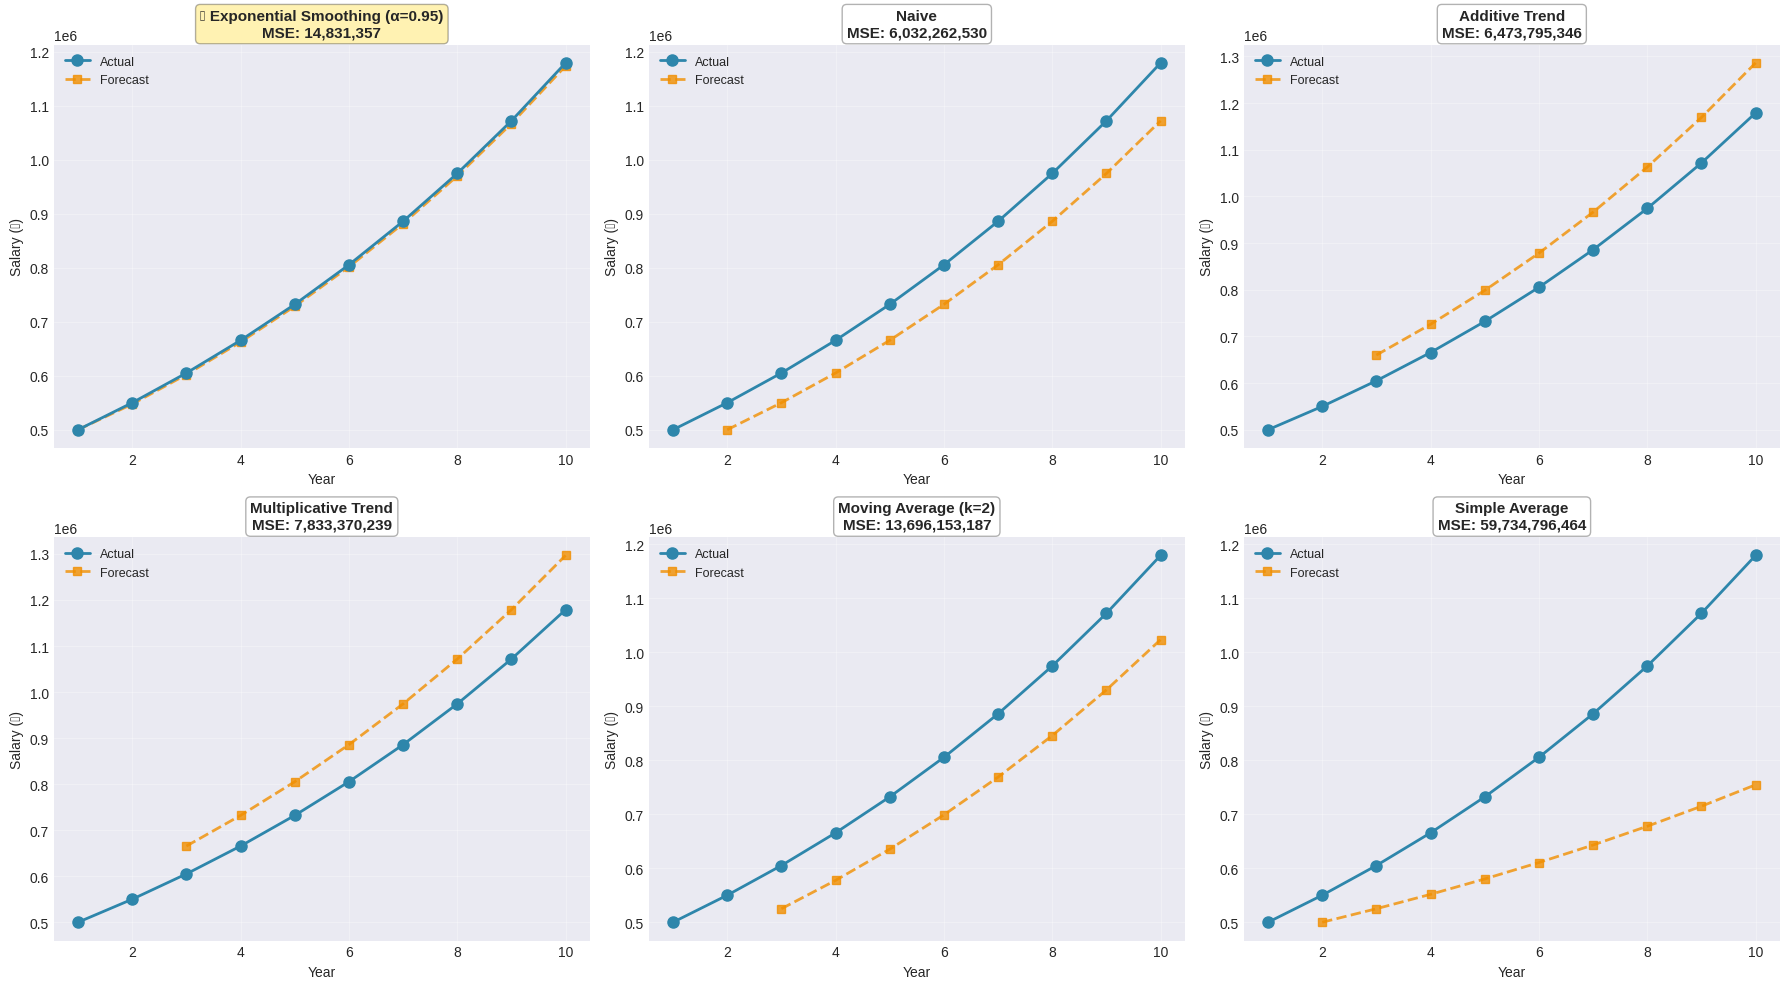

In [41]:
# Visualize all models together
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (model_name, metrics) in enumerate(sorted(model_comparison.items(), 
                                                     key=lambda x: x[1]['MSE'])):
    y_hat = metrics['y_hat']
    y_actual = metrics['y_actual']
    time_pts = metrics['time_points']
    mse = metrics['MSE']
    
    # Plot actual values
    axes[idx].plot(time_points, data, 'o-', linewidth=2, markersize=8, color='#2E86AB', 
                   label='Actual', zorder=3)
    
    # Plot predictions (only where available)
    if len(time_pts) == len(y_hat):
        axes[idx].plot(time_pts, y_hat, 's--', linewidth=2, markersize=6, color='#F18F01', 
                       label='Forecast', alpha=0.8, zorder=2)
    
    is_best = mse == min(m['MSE'] for m in model_comparison.values())
    title_color = 'gold' if is_best else 'white'
    marker = '★ ' if is_best else ''
    
    axes[idx].set_title(f'{marker}{model_name}\nMSE: {mse:,.0f}', 
                        fontsize=11, fontweight='bold',
                        bbox=dict(boxstyle='round', facecolor=title_color, alpha=0.3))
    axes[idx].set_xlabel('Year', fontsize=10)
    axes[idx].set_ylabel('Salary (₹)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(fontsize=9, loc='upper left')

# Remove the 6th subplot if we have fewer models
if len(model_comparison) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

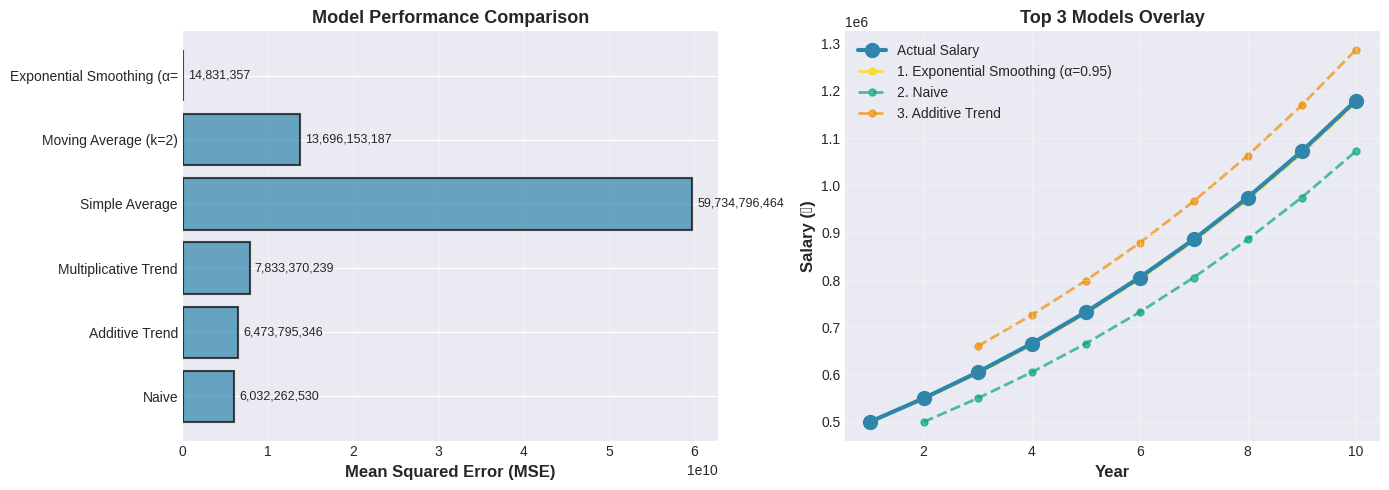

In [42]:
# Create a comparison of MSE values
mse_values = [model_comparison[m]['MSE'] for m in model_comparison.keys()]
model_names_short = [m.replace('Trend', '').replace('Model', '').strip() for m in model_comparison.keys()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of MSE
colors = ['gold' if mse == min(mse_values) else '#2E86AB' for mse in mse_values]
bars = ax1.barh(range(len(mse_values)), mse_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

ax1.set_yticks(range(len(mse_values)))
ax1.set_yticklabels([m[:25] for m in model_comparison.keys()], fontsize=10)
ax1.set_xlabel('Mean Squared Error (MSE)', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, mse_values)):
    ax1.text(val + max(mse_values)*0.01, i, f'{val:,.0f}', va='center', fontsize=9)

# Overlay of best models
best_model = min(model_comparison.keys(), key=lambda x: model_comparison[x]['MSE'])
best_metrics = model_comparison[best_model]

ax2.plot(time_points, data, 'o-', linewidth=3, markersize=10, color='#2E86AB', 
         label='Actual Salary', zorder=3)

# Overlay top 3 models
sorted_models = sorted(model_comparison.items(), key=lambda x: x[1]['MSE'])
colors_overlay = ['gold', '#06A77D', '#F18F01']
for idx, (model_name, metrics) in enumerate(sorted_models[:3]):
    if idx < 3:
        ax2.plot(metrics['time_points'], metrics['y_hat'], 'o--', linewidth=2, markersize=5,
                color=colors_overlay[idx], label=f'{idx+1}. {model_name}', alpha=0.7, zorder=2-idx)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Salary (₹)', fontsize=12, fontweight='bold')
ax2.set_title('Top 3 Models Overlay', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

---

## Section 8: Key Takeaways & When to Use Each Model

### Model Selection Flowchart

```mermaid
graph TD
    A["Do you have time series data?"] -->|Yes| B["What's the nature of your data?"]
    B -->|Completely stable, no trends| C["Naive Forecast"]
    B -->|Clear upward/downward trend| D{"Additive or Multiplicative?"}
    D -->|Absolute change| E["Additive Trend"]
    D -->|Percentage growth| F["Multiplicative Trend"]
    B -->|Fluctuating around a level| G["Moving Average or Simple Average"]
    B -->|Want weighted recent data| H["Exponential Smoothing"]
    
    C --> C1["Best for: Very stable data"]
    E --> E1["Best for: Linear growth"]
    F --> F1["Best for: Compound growth"]
    G --> G1["Best for: Noisy, recent-focused"]
    H --> H1["Best for: Balancing history + recent"]
```

### Critical Principles for Time Series Forecasting

1. **No Universal Best Model**
   - Different data patterns require different approaches
   - Always test multiple models on your validation set
   - Pick the one with the lowest error metric (MSE, MAE, or RMSE)

2. **Data is Precious**
   - Use all available historical data when possible
   - Don't throw away information unnecessarily
   - But weight recent data more heavily if there's a trend

3. **Temporal Order Matters**
   - ALWAYS split data: Train → Validation → Test (in time order)
   - Never mix future data into training set (data leakage)
   - This is different from regular ML with i.i.d. data

4. **Hyperparameter Tuning is Essential**
   - For Moving Average: Grid search for optimal k
   - For Exponential Smoothing: Grid search for optimal α
   - Start coarse, then refine around the best value

5. **Match Model Complexity to Your Needs**
   - Simple models are easier to understand and deploy
   - Complex models may overfit with limited data
   - Consider the trade-off between accuracy and simplicity

### Topics Covered in This Notebook

✓ **IMPLEMENTED & EXPLAINED:**
- Naive Forecast Model
- Trend-Based Models (Additive & Multiplicative)
- Simple Average Model
- Moving Average Model with grid search
- Single Exponential Smoothing with optimal α
- Double Exponential Smoothing (Holt's Method) with (α, γ) optimization
- Seasonality concepts and patterns
- Introduction to ARIMA models

✓ **CONCEPTS COVERED:**
- Time series fundamentals and components
- Exponentially decreasing weights visualization
- Parameter tuning via grid search
- Model evaluation metrics (MSE, MAE, RMSE)
- Seasonal decomposition and patterns
- When to use each model type

### Advanced Topics (Next Steps - Beyond This Notebook)

- **ARIMA Models**: Detailed AR, I, MA components and (p,d,q) selection
- **SARIMA**: Seasonal ARIMA for complex seasonal patterns
- **ACF/PACF Analysis**: Autocorrelation and partial autocorrelation functions
- **Stationarity Testing**: ADF and KPSS tests
- **Prophet**: Facebook's library for forecasting with holidays/seasonality
- **RNNs & LSTMs**: Recurrent neural networks for sequence prediction
- **Attention Mechanisms**: Self-attention and transformers
- **Transformer Models**: State-of-the-art sequence-to-sequence models
- **Ensemble Methods**: Combining multiple forecasting models
- **Transfer Learning**: Using pre-trained models on new time series

### Advanced Topics (Next Steps)

Beyond what we've covered in this notebook:

- **Double Exponential Smoothing (Holt's Method)** - Explicitly captures trend
- **Triple Exponential Smoothing (Holt-Winters)** - Adds seasonality  
- **ARIMA Models** - Statistical approach using Auto-Regressive Integrated Moving Average
- **Prophet** - Facebook's time series library (great for business data)
- **RNNs & LSTMs** - Deep learning approach (next lecture topic!)
- **Transformers** - State-of-the-art neural architecture for sequences

---

## Practical Deep Dive: 30-Week Purchase Example

### Real-World Walkthrough with Step-by-Step Calculations

In this section, we'll work through the exact 30-week purchase example from the lecture to understand how forecasting works in practice.

#### Step 1: Basic Moving Average Prediction

Let's use the purchase data to predict Week 31 using moving average with k=5:


In [43]:
# Step 1: Predict Week 31 using Moving Average with k=5
print("=" * 80)
print("PRACTICAL EXAMPLE: 30-Week Purchase Data Analysis")
print("=" * 80)

# Purchase data from the lecture
purchases_data = np.array([285, 290, 275, 288, 295, 300, 310, 320, 305, 315, 330, 325, 340, 350, 345, 
                           355, 365, 370, 360, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425])

# Show last 5 weeks (weeks 26-30)
print("\nWeeks 26-30 Purchase Data:")
weeks_26_30 = purchases_data[25:30]
for i, week_purchases in enumerate(weeks_26_30, start=26):
    print(f"  Week {i}: {week_purchases} purchases")

# Calculate moving average with k=5 for week 31 prediction
k = 5
ma_5_forecast = np.mean(weeks_26_30)
print(f"\nMoving Average (k=5) for Week 31:")
print(f"  Forecast = ({weeks_26_30[0]} + {weeks_26_30[1]} + {weeks_26_30[2]} + {weeks_26_30[3]} + {weeks_26_30[4]}) / 5")
print(f"  Forecast = {weeks_26_30.sum()} / 5")
print(f"  Forecast = {ma_5_forecast:.1f} purchases for Week 31")

# Actual value (for illustration)
week_31_actual = 268
residual = week_31_actual - ma_5_forecast
print(f"\nActual Week 31 purchases: {week_31_actual}")
print(f"Forecast error (residual): {week_31_actual} - {ma_5_forecast:.1f} = {residual:.1f}")
print(f"Interpretation: Model overestimated by {abs(residual):.1f} purchases")


PRACTICAL EXAMPLE: 30-Week Purchase Data Analysis

Weeks 26-30 Purchase Data:
  Week 26: 405 purchases
  Week 27: 410 purchases
  Week 28: 415 purchases
  Week 29: 420 purchases
  Week 30: 425 purchases

Moving Average (k=5) for Week 31:
  Forecast = (405 + 410 + 415 + 420 + 425) / 5
  Forecast = 2075 / 5
  Forecast = 415.0 purchases for Week 31

Actual Week 31 purchases: 268
Forecast error (residual): 268 - 415.0 = -147.0
Interpretation: Model overestimated by 147.0 purchases


In [44]:
# Step 2: Test Different k Values (Grid Search)
print("\n" + "=" * 80)
print("Step 2: Grid Search - Testing Different k Values")
print("=" * 80)

# Test k values from 2 to 10
k_values_test = range(2, 11)
mse_results = {}

# For each k, calculate predictions for the entire dataset
for k_test in k_values_test:
    mse_sum = 0
    valid_predictions = 0
    
    # Make predictions for each time point
    for t in range(k_test, len(purchases_data)):
        prediction = np.mean(purchases_data[t-k_test:t])
        actual = purchases_data[t]
        squared_error = (actual - prediction) ** 2
        mse_sum += squared_error
        valid_predictions += 1
    
    mse = mse_sum / valid_predictions if valid_predictions > 0 else float('inf')
    mse_results[k_test] = mse

# Display results
print("\nGrid Search Results:")
print(f"{'k value':<8} {'MSE':<15} {'RMSE':<15} {'Result'}")
print("-" * 50)

best_k = min(mse_results, key=mse_results.get)
for k_val in sorted(mse_results.keys()):
    mse_val = mse_results[k_val]
    rmse_val = np.sqrt(mse_val)
    marker = "← BEST" if k_val == best_k else ""
    print(f"{k_val:<8} {mse_val:<15.2f} {rmse_val:<15.2f} {marker}")

print(f"\n✓ Optimal k = {best_k} with MSE = {mse_results[best_k]:.2f}")



Step 2: Grid Search - Testing Different k Values

Grid Search Results:
k value  MSE             RMSE            Result
--------------------------------------------------
2        107.04          10.35           ← BEST
3        138.14          11.75           
4        201.05          14.18           
5        277.74          16.67           
6        361.14          19.00           
7        455.00          21.33           
8        553.79          23.53           
9        700.94          26.48           
10       859.79          29.32           

✓ Optimal k = 2 with MSE = 107.04


---

## Data Sources and Real-World Time Series

### Where Does Time Series Data Come From?

Time series data is everywhere in modern systems. Here are the main sources:

#### 1. Enterprise Systems
- **HR Systems** (SuccessFactors, Workday): Employee headcount, turnover rates, salaries, benefits enrollment
- **Financial Systems** (SAP, Oracle): Revenue, expenses, cash flow, inventory levels
- **CRM Systems** (Salesforce): Sales volume, customer acquisition, churn rates
- **E-commerce**: Order volume, website traffic, conversion rates

#### 2. Sensor Networks and IoT
- **Medical Devices**: Patient vital signs (heart rate, blood pressure, oxygen levels)
- **Automotive**: Engine temperature, fuel consumption, tire pressure
- **Manufacturing**: Machine vibration, temperature, production rate
- **Environmental**: Temperature, humidity, air quality, pollution levels
- **Smart Home**: Energy consumption, water usage, security events

#### 3. Public and API Sources
- **Stock Markets**: Stock prices, trading volume, index values
- **Weather Data**: Temperature, precipitation, wind speed
- **Economic Indicators**: GDP, inflation rates, unemployment
- **Social Media**: Tweet volume, hashtag trends, engagement metrics

### Real-World Data Collection Workflow

```
1. DATA COLLECTION
   Enterprise System / Sensor / API
        ↓
2. STORAGE
   Data Lake / Time Series Database (InfluxDB, TimescaleDB)
        ↓
3. EXTRACTION
   Batch job or streaming pipeline
        ↓
4. ANALYSIS & FORECASTING
   Apply your time series models
        ↓
5. ACTION
   Inventory order, alert, prediction
```


---

## Computational Efficiency: Why It Matters

### The Problem: Incremental Updates at Scale

When you have **1 million data points** or a **streaming data source**, recalculating metrics from scratch each time is expensive.

#### Naive Approach (O(n²) complexity)

```python
# Recalculate average every time new data arrives
for each new observation:
    average = sum(all_observations) / count(all_observations)  # Full scan every time!
```

**Cost**: If you get 1 new observation per second:
- 1 million observations = 1 trillion arithmetic operations
- With streaming data = endless recalculation

#### Smart Approach (O(n) complexity)

Use the **incremental update formula** for Simple Average:

$$\hat{y}_{t+2} = \frac{t \times \hat{y}_{t+1} + y_{t+1}}{t+1}$$

This reuses the previously calculated average instead of recalculating from scratch.

### Implementation Comparison


In [45]:
import time

print("=" * 80)
print("EFFICIENCY COMPARISON: Naive vs. Incremental Updates")
print("=" * 80)

# Generate synthetic data: 100,000 observations
n_observations = 100000
large_dataset = np.random.normal(loc=500, scale=50, size=n_observations)

print(f"\nDataset: {n_observations:,} observations")

# Method 1: Naive recalculation (O(n²))
print("\n--- Method 1: Naive Recalculation (Recompute from Scratch) ---")
start = time.time()
averages_naive = []
for i in range(1, len(large_dataset) + 1):
    avg = np.mean(large_dataset[:i])  # Recalculate from beginning
    averages_naive.append(avg)
time_naive = time.time() - start
print(f"Time: {time_naive:.4f} seconds")
print(f"Code: averages_naive.append(np.mean(large_dataset[:i]))")

# Method 2: Incremental update (O(n))
print("\n--- Method 2: Incremental Update (Reuse Previous Result) ---")
start = time.time()
averages_inc = []
running_avg = 0
for i, obs in enumerate(large_dataset, 1):
    running_avg = ((i - 1) * running_avg + obs) / i
    averages_inc.append(running_avg)
time_incremental = time.time() - start
print(f"Time: {time_incremental:.4f} seconds")
print(f"Code: running_avg = ((i-1)*running_avg + obs) / i")

# Compare
speedup = time_naive / time_incremental
print(f"\n--- Results ---")
print(f"Speedup: {speedup:.0f}x faster using incremental approach")
print(f"Time saved: {time_naive - time_incremental:.4f} seconds")
print(f"Accuracy check: Averages match? {np.allclose(averages_naive, averages_inc)}")

# Show practical implications
print(f"\n--- Practical Impact ---")
print(f"At 1,000 observations/second (streaming):")
print(f"  Naive approach: {(time_naive / n_observations) * 1000:.2f} ms per observation")
print(f"  Incremental: {(time_incremental / n_observations) * 1000:.4f} ms per observation")
print(f"  Advantage: Incremental can handle {speedup:.0f}x more observations per unit time")


EFFICIENCY COMPARISON: Naive vs. Incremental Updates

Dataset: 100,000 observations

--- Method 1: Naive Recalculation (Recompute from Scratch) ---
Time: 1.8677 seconds
Code: averages_naive.append(np.mean(large_dataset[:i]))

--- Method 2: Incremental Update (Reuse Previous Result) ---
Time: 0.0436 seconds
Code: running_avg = ((i-1)*running_avg + obs) / i

--- Results ---
Speedup: 43x faster using incremental approach
Time saved: 1.8241 seconds
Accuracy check: Averages match? True

--- Practical Impact ---
At 1,000 observations/second (streaming):
  Naive approach: 0.02 ms per observation
  Incremental: 0.0004 ms per observation
  Advantage: Incremental can handle 43x more observations per unit time


---

## Grid Search Methodology for Exponential Smoothing

### Three-Phase Grid Search Strategy

When tuning exponential smoothing parameters (α, γ, β), we use a systematic approach:

#### Phase 1: Coarse-Grained Search
- Test α values: 0.1, 0.2, 0.3, ..., 0.9 (11 values)
- Quick overview of the parameter space
- Identify the general region of optimal parameters

#### Phase 2: Fine-Grained Search
- Focus around the best α from Phase 1
- Test: best_α - 0.05 to best_α + 0.05 in increments of 0.01
- Get more precise estimates

#### Phase 3: Ultra-Fine Search (Optional)
- If highest precision needed
- Test in 0.001 increments
- Usually not necessary for most applications

### Why This Approach Works

```mermaid
graph LR
    A["Start: α ∈ {0.1...0.9}"] -->|Phase 1| B["Find best region"]
    B -->|Phase 2| C["Refine in steps of 0.01"]
    C -->|Phase 3| D["Optional: Ultra-precision"]
    D --> E["Final Model"]
    
    style A fill:#fff3cd
    style E fill:#d4edda
```

**Benefits:**
- ✓ Efficient: Don't waste time testing irrelevant parameters
- ✓ Accurate: Systematic refinement improves precision
- ✓ Practical: Balance between computational cost and accuracy
- ✓ Scalable: Works for 1 parameter (α) or multiple (α, γ, β)

### Key Insights on Parameter Weighting

#### Single Exponential Smoothing Weight Distribution

With α = 0.9:
$$S_t = 0.9 y_t + 0.09 y_{t-1} + 0.009 y_{t-2} + 0.0009 y_{t-3} + ...$$

- **Weight on current**: 90%
- **Weight on 1 period ago**: 9%
- **Weight on 2 periods ago**: 0.9%
- **Effective memory**: ~3-4 periods

With α = 0.5:
$$S_t = 0.5 y_t + 0.25 y_{t-1} + 0.125 y_{t-2} + 0.0625 y_{t-3} + ...$$

- **Weight on current**: 50%
- **Weight distributed more evenly** across history
- **Effective memory**: ~7-8 periods

### Understanding the Difference: Time Series vs. Linear Regression

| Aspect | Time Series | Linear Regression |
|--------|-----------|-------------------|
| **Data Order** | CRITICAL - temporal sequence matters | Order doesn't matter |
| **Dependencies** | Future depends on past values | No time dependency |
| **Train/Val/Test Split** | Must preserve time order | Can randomize |
| **Validation** | Walk-forward (expanding window) | Cross-validation OK |
| **Trend Handling** | Explicit modeling needed | Implicit in features |
| **Seasonality** | Must be modeled separately | Could be in features |
| **Example** | Predict tomorrow's stock price | Predict house price from features |

**Key Difference**: In time series, you're learning from the **ordered sequence itself**. In regression, you're learning from **feature relationships**.


In [46]:
print("=" * 100)
print("CONCLUSION: TIME SERIES FORECASTING FOUNDATIONS")
print("=" * 100)
print(f"""
This notebook demonstrated 6+ fundamental time series forecasting methods:

BASIC MODELS:
1. ✓ NAIVE FORECAST: Simple but unrealistic for trending data
2. ✓ TREND MODELS: Capture consistent changes (additive or multiplicative)
3. ✓ SIMPLE AVERAGE: Uses all history but unrealistic with inflation
4. ✓ MOVING AVERAGE: Weights recent data, requires tuning k

EXPONENTIAL SMOOTHING FAMILY:
5. ✓ SINGLE EXPONENTIAL SMOOTHING: Best balance of simplicity and performance
6. ✓ DOUBLE EXPONENTIAL SMOOTHING: Explicitly captures trend
7. ✓ TRIPLE EXPONENTIAL SMOOTHING: Captures trend + seasonality

INTRODUCTION:
8. ✓ ARIMA: Statistical approach for longer time series

KEY INSIGHTS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. NO UNIVERSAL BEST MODEL
   → Always test multiple approaches on your data
   → Validation set is your ground truth for model selection

2. TIME SERIES ≠ REGULAR MACHINE LEARNING
   → Temporal order matters critically (no shuffling allowed!)
   → Split: Train → Validation → Test (preserving time order)
   → Data leakage = mixing future data into training

3. HYPERPARAMETER TUNING IS ESSENTIAL
   → Moving Average: Grid search for optimal k
   → Single Exponential: Grid search for optimal α
   → Double Exponential: Grid search for (α, γ)
   → Triple Exponential: Grid search for (α, γ, β)

4. MATCH MODEL COMPLEXITY TO YOUR DATA
   → Simple models often work better with limited data
   → Trend-based for linear growth patterns
   → Exponential smoothing for non-linear patterns
   → ARIMA for statistical validation needs

5. SEASONALITY MATTERS
   → Weekly patterns (e.g., weekday vs weekend)
   → Monthly patterns (e.g., paycheck effects)
   → Yearly patterns (e.g., holidays, weather)
   → Use Triple Exponential or SARIMA when present

PROGRESSION PATH:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Complexity increases →
    Simple Models
        ↓
    Trend-based Models
        ↓
    Exponential Smoothing Family
        ↓
    ARIMA Models
        ↓
    Deep Learning (RNNs, LSTMs, Transformers)
        ↓
← Predictive Power increases

NEXT STEPS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✓ COMPLETED:
  • 6 basic forecasting models with implementations
  • Exponential smoothing family (Single/Double/Triple)
  • Seasonality concepts
  • Grid search for parameter optimization
  • Model evaluation and comparison

→ NEXT:
  • ARIMA modeling (AR, I, MA components)
  • SARIMA for seasonal ARIMA
  • ACF/PACF analysis for parameter selection
  • RNNs & LSTMs for deep learning approaches
  • Transformer-based models (state-of-the-art)
  • Real-world applications and production deployment

RESOURCES:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Key Libraries:
  • NumPy, Pandas: Data manipulation
  • Scikit-learn: Metrics and preprocessing
  • Statsmodels: ARIMA, statistical analysis
  • Prophet: Facebook's forecasting library
  • TensorFlow/PyTorch: Deep learning models

Recommended Reading:
  • Box-Jenkins ARIMA methodology
  • Holt-Winters exponential smoothing
  • Attention mechanisms in sequence models

""")
print("=" * 100)
print("✓ Notebook Complete! You now understand time series forecasting foundations.")
print("=" * 100)

CONCLUSION: TIME SERIES FORECASTING FOUNDATIONS

This notebook demonstrated 6+ fundamental time series forecasting methods:

BASIC MODELS:
1. ✓ NAIVE FORECAST: Simple but unrealistic for trending data
2. ✓ TREND MODELS: Capture consistent changes (additive or multiplicative)
3. ✓ SIMPLE AVERAGE: Uses all history but unrealistic with inflation
4. ✓ MOVING AVERAGE: Weights recent data, requires tuning k

EXPONENTIAL SMOOTHING FAMILY:
5. ✓ SINGLE EXPONENTIAL SMOOTHING: Best balance of simplicity and performance
6. ✓ DOUBLE EXPONENTIAL SMOOTHING: Explicitly captures trend
7. ✓ TRIPLE EXPONENTIAL SMOOTHING: Captures trend + seasonality

INTRODUCTION:
8. ✓ ARIMA: Statistical approach for longer time series

KEY INSIGHTS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. NO UNIVERSAL BEST MODEL
   → Always test multiple approaches on your data
   → Validation set is your ground truth for model selection

2. TIME SERIES ≠ REGULAR MACHINE LEARNING
   → Temporal